# **Machine Learning Final Project**

## 1. problem statement?
Create a machine learning model which will help the company **TechWorks Consulting** in determining the salary of newly hired employees using the given data.

## 2. What will be your approach to solving this task?

My approach to solving this task is as follows:

(A) Data Preprocessing:

  - Convert the "College" feature into a numerical type based on the college tier.
  - Numerically encode the "City" field (0 for non-metro, 1 for metro cities).
  - Create dummy variables for the "Tier" and "Role" attributes.
  - Conduct Exploratory Data Analysis (EDA) and address any null values.
  - Visualize data through various graphs to identify outliers.
  - Use percentile-based outlier detection (e.g., 99th and 1st percentiles).
  - Handle outliers by replacing them with the mean if necessary.

(B) Model Selection:

   - Explore regression models suitable for predicting salary, such as Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression Random Forest Regressor, XG Boost Regressor, and Bagging Regressor.
   - Standardize the data for modeling purposes.
   - Evaluate multiple models to gauge their performance.

(C) Model Training and Evaluation:

  - Split the data into training and testing sets.
  - Train each model on the training data.
  - Assess model performance using metrics like R-Squared and Mean Squared Error (MSE).
  - Choose the model demonstrating the best performance.

(D) Model Optimization:

  - Optimize models using cross-validation and hyperparameter tuning.
      - For Ridge and Lasso Regression, utilize validation curves for hyperparameter adjustment.
      - For Decision Tree Regression, Random Forest, XGB Regressor, and Bagging Regressor, employ GridSearchCV with parameter grids for max depth, min sample split, and min sample leaf.

(E) Conclusion or Result:

After evaluating all models, the selection will be based on the highest R2 score and lowest MSE. The model exhibiting a high R2 score and low MSE will be considered the most optimal

## **3. What were the available ML model options you had to perform this task?**

For predicting employee salaries, we considered various regression models:

For predicting employee salaries, we considered a range of regression models. Each model offers unique characteristics and advantages for different scenarios:

1. **Simple Linear Regression:**
   - Suitable when there's a straightforward, linear relationship between one feature and salary.

2. **Multiple Linear Regression:**
   - Useful when multiple features influence salary, allowing for more complex relationships to be considered.

3. **Ridge Regression:**
   - Prevents overfitting by adding a penalty term, making it ideal for handling multicollinearity among features.

4. **Lasso Regression:**
   - Combats overfitting and aids feature selection by encouraging some features to have zero influence on salary prediction.

5. **Decision Tree Regression:**
   - A non-linear model that captures complex relationships when the salary prediction is not linear.

6. **Random Forest Regressor:**
   - An ensemble learning model that combines multiple decision trees to improve predictive performance.

7. **XG Boost Regressor:**
   - A gradient boosting model known for its high predictive power and computational efficiency.

8. **Bagging Regressor:**
   - Utilizes Bootstrap Aggregating to create an ensemble of multiple decision tree regressors for enhanced prediction accuracy.

## 4. Which model’s performance is best and what could be the possible reason for that?

I evaluated several regression models to predict the target variable


- Based on the results, the Random Forest Regressor with the hyperparameters (max_depth=30, n_estimators=300) is the best performer for predicting the target variable.



**Random Forest Regressor:**
- Best Hyperparameters: RandomForestRegressor(max_depth=30, n_estimators=300)
- R-squared (R^2) - Train: 0.9493, Test: 0.6590
- Mean Squared Error (MSE) - Train: 8154715.2179, Test: 50597423.3677


## 5. What steps can you take to improve this selected model’s performance even further?

To further enhance the performance of the selected model, I took the following steps:

1. **Validation Curve for Ridge and Lasso Regression:**
    - For Ridge regression, I used a validation curve to explore different values of alpha. This helped me identify the optimal alpha value that balances bias and variance effectively.
    - The best alpha for Ridge regression was found to be approximately 10.72.
    
    - For Lasso regression, a similar validation curve was employed to determine the best alpha. The optimal alpha for Lasso regression was approximately 86.97.
    
    - These optimal alpha values are crucial for regularizing the model and preventing overfitting.

2. **GridSearchCV for Tree Regression:**
    - To further improve the performance of the Decision Tree Regression model, I utilized GridSearchCV. This technique systematically searches through a range of hyperparameters to find the best combination that optimizes model performance.
    - The best hyperparameters for the Decision Tree Regression model were identified as follows:
        - 'max_depth': 4
        - 'min_samples_leaf': 1
        - 'min_samples_split': 5
    - Random Forest Regressor achieved the best hyperparameters with a max depth of 30 and 300 estimators.
     - XG Boost Regressor was optimized with a learning rate of 0.1, max depth of 4, and 100 estimators.
      - Bagging Regressor was configured with 100 decision tree estimators.
          
By performing these steps, I have fine-tuned the model and optimized its hyperparameters to increase its efficiency and accuracy in making predictions.




# Execute the Machine Learning Models

### Data Preprocessing

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')
# Read the data from a CSV file named 'ML case Study.csv' and store it in a dataframe named 'df'.
main = "/content/drive/MyDrive/ML project/final project datsets/ML case Study.csv"
df = pd.read_csv(main)


# Read data from a CSV file named 'Colleges.csv' and store it in a dataframe named 'college_data_df'.
clg_csv = "/content/drive/MyDrive/ML project/final project datsets/Colleges.csv"
college_data_df = pd.read_csv(clg_csv)

# Read data from a CSV file named 'cities.csv' and store it in a dataframe named 'city_data_df'.
city_csv = "/content/drive/MyDrive/ML project/final project datsets/cities.csv"
city_data_df = pd.read_csv(city_csv)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Function to assign tier labels to colleges based on 'college_data_df'.

def assign_tier(row):
     # If 'College' is in 'Tier 1', assign 'Tier 1'
    if row['College'] in college_data_df['Tier 1'].values:
        return 'Tier 1'
    # If 'College' is in 'Tier 2', assign 'Tier 2'
    elif row['College'] in college_data_df['Tier 2'].values:
        return 'Tier 2'
    # If 'College' is in 'Tier 3', assign 'Tier 3'
    elif row['College'] in college_data_df['Tier 3'].values:
        return 'Tier 3'
    # If not found in any tier, assign 'Unknown'
    else:
        return 'Unknown'

In [5]:
# Function to assign a city type (metro or non-metro) based on 'city_data_df'.

def assign_city(row):
    if row['City'] in city_data_df['Metrio City'].values:
        return 1
    elif row['City'] in city_data_df['non-metro cities'].values:
        return 0
    else:
        return 'unknown'


In [6]:
# Apply 'assign_city' function to create a 'metro_city' column in the 'df' dataframe.
df['metro_city'] = df.apply(assign_city, axis=1)

# Apply 'assign_tier' function to create a 'Tier' column in the 'df' dataframe.
df['Tier'] = df.apply(assign_tier, axis=1)

In [7]:
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,0,Tier 2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,0,Tier 2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,0,Tier 3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,0,Tier 3
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,0,Tier 1
...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59,1,Tier 1
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86,0,Tier 1
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19,1,Tier 1
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09,0,Tier 1


### Create Dummy variables

In [8]:
#Create Dummies variable for 'Tier' and 'Role' columns
df = pd.get_dummies(df, columns = ['Tier', 'Role'])

#Rename the tier columns to remove the 'Tier_' prefix
df = df.rename(columns={'Tier_Tier 1': 'Tier_1'})
df = df.rename(columns={'Tier_Tier 2': 'Tier_2'})
df = df.rename(columns={'Tier_Tier 3': 'Tier_3'})

In [9]:
# deleting unnecessary columns

del df['College']
del df['City']


In [10]:
# Convert boolean columns to integer (0 or 1) in the 'df' dataframe.

for column in df.select_dtypes(include=['bool']):
    df[column] = df[column].astype(int)


### EDD Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   metro_city           1589 non-null   int64  
 6   Tier_1               1589 non-null   int64  
 7   Tier_2               1589 non-null   int64  
 8   Tier_3               1589 non-null   int64  
 9   Role_Executive       1589 non-null   int64  
 10  Role_Manager         1589 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 136.7 KB


In [12]:
df.shape

(1589, 11)

In [13]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.514160,0.363751,0.297042,0.339207,0.793581,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.499957,0.481230,0.457099,0.473589,0.404862,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,0,0,1,0,0,1
1,57081.0,1,84,18,68005.87,0,0,1,0,1,0
2,60347.0,2,52,28,76764.02,0,0,0,1,1,0
3,49010.0,2,81,33,82092.39,0,0,0,1,1,0
4,57879.0,4,74,32,73878.10,0,1,0,0,1,0


### Check for Null values

In [15]:
# Calculate the count of null values for each column in the 'df' DataFrame.
null_values = df.isna().sum()

# Print columns with more than 0 null values.
print(null_values[null_values > 0])

Series([], dtype: int64)


##### Note : There is no null values in this data

## Outliers Determination and Treatment

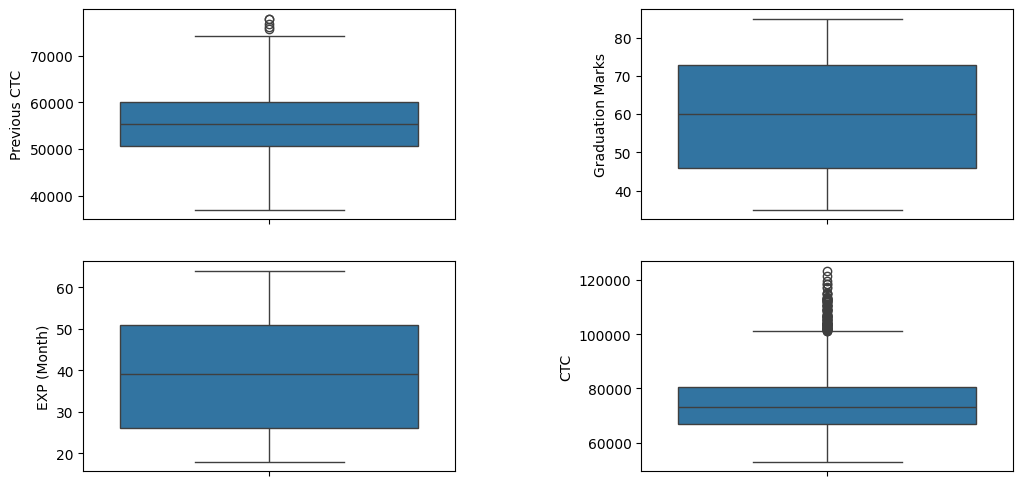

In [87]:
numerical_columns = ['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC']
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)

plt.show()

<Axes: xlabel='Previous CTC', ylabel='CTC'>

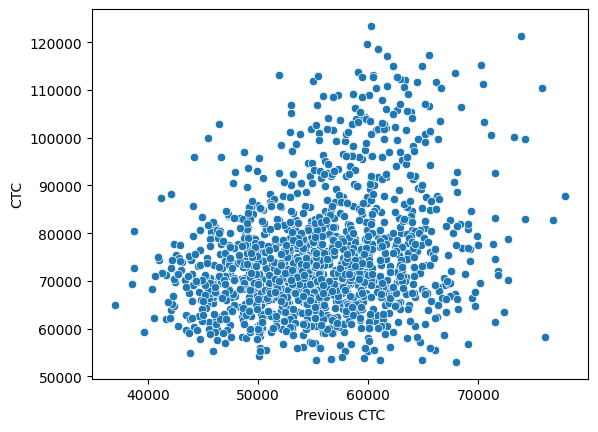

In [17]:
sns.scatterplot(x = df['Previous CTC'], y = df['CTC'])

<Axes: xlabel='Previous job change', ylabel='CTC'>

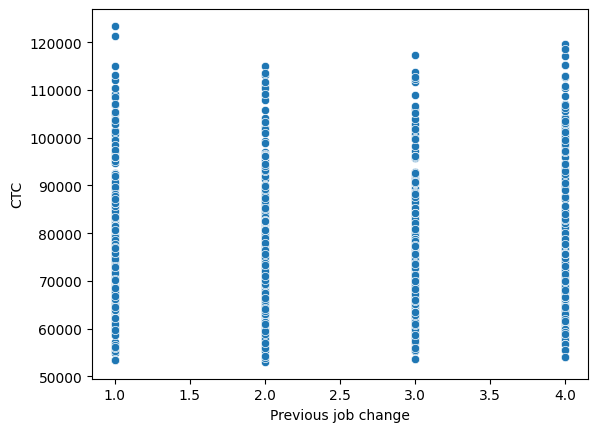

In [18]:
sns.scatterplot(x = 'Previous job change', y = 'CTC', data = df)

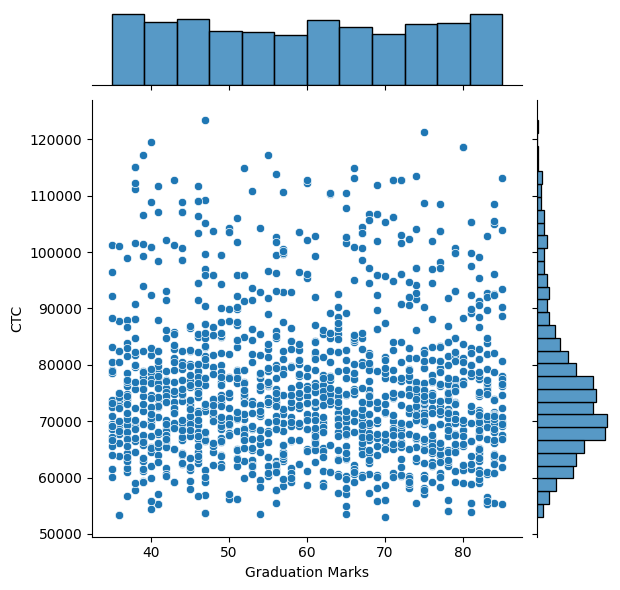

In [19]:
sns.jointplot(x = df['Graduation Marks'], y= df['CTC'])

<ipython-input-20-349e947f9ea1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CTC'])


<Axes: xlabel='CTC', ylabel='Density'>

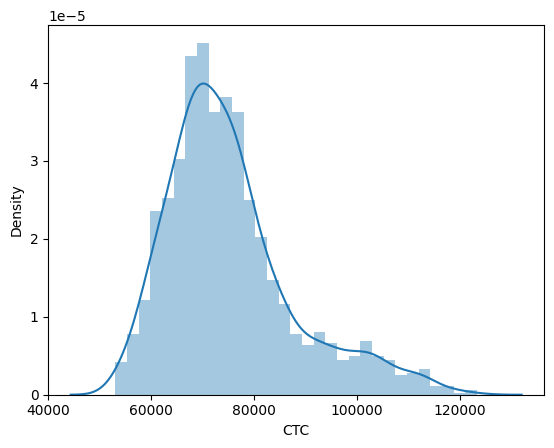

In [20]:
sns.distplot(df['CTC'])

In [21]:
# Calculate the 99th percentile value of the 'Previous CTC' column in the 'df' DataFrame.

upper_limit = np.percentile(df['Previous CTC'], [99])[0]

In [22]:
upper_limit

71506.92

In [23]:
#check values that highr then upper value

df[(df['Previous CTC'] > upper_limit)]

#there is many values that is higher then upper limit but it is in considerable range

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
116,77911.0,1,50,58,87831.62,1,0,0,1,1,0
292,74198.0,1,57,25,99644.51,0,0,0,1,0,1
543,73856.0,1,75,54,121362.73,1,1,0,0,0,1
572,71543.0,4,82,30,61366.78,1,1,0,0,1,0
701,71549.0,4,47,50,83116.21,0,0,1,0,1,0
847,71756.0,4,67,23,72141.43,1,1,0,0,1,0
860,75785.0,4,63,37,110338.25,1,1,0,0,0,1
941,72319.0,1,51,50,63538.43,1,0,0,1,1,0
1024,72661.0,3,74,47,70238.70,1,1,0,0,1,0
1047,73214.0,4,57,22,100119.53,0,1,0,0,0,1


In [24]:
#replace values that is higher then upper limit

df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit

<ipython-input-24-b089b484c2f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit


In [25]:
#upper limit for CTC

upper_limit2 = np.percentile(df['CTC'], [99])[0]

In [26]:
upper_limit2

112826.26

In [27]:
#check values that highr then upper value

df[(df['CTC'] > upper_limit2)]

#there is many values that is higher then upper limit but it is in considerable range

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
34,60894.0,4,80,28,118651.89,0,1,0,0,0,1
185,70258.0,4,38,36,115126.75,0,0,1,0,0,1
254,51912.0,2,66,50,113141.14,1,0,1,0,0,1
328,62264.0,2,52,64,114996.23,0,0,0,1,0,1
543,73856.0,1,75,54,121362.73,1,1,0,0,0,1
577,59101.0,3,56,31,113843.16,1,0,0,1,0,1
668,60476.0,1,85,62,113212.07,1,1,0,0,0,1
883,64930.0,1,66,51,114939.65,1,0,0,1,0,1
1146,61709.0,4,39,60,117207.24,1,1,0,0,0,1
1230,60298.0,1,47,52,123416.99,0,0,1,0,0,1


In [28]:
#replace values that is higher then upper limit

df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2

<ipython-input-28-001ccada9dba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2


##### Note : There is no outliers in this data which can affect the data

## Correlation Matrix

In [29]:
df.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,0.004644,-0.031366,-0.010947,0.042438,-0.012321,0.012321
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.051670,0.045931,0.004271,-0.050794,0.017150,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.018616,0.005666,-0.018419,0.012021,-0.017858,0.017858
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.023613,-0.003323,-0.014558,0.017427,0.026751,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,-0.020365,0.019912,0.012346,-0.032149,-0.621311,0.621311
metro_city,0.004644,0.051670,-0.018616,-0.023613,-0.020365,1.000000,0.002135,0.022917,-0.024288,0.048671,-0.048671
Tier_1,-0.031366,0.045931,0.005666,-0.003323,0.019912,0.002135,1.000000,-0.491510,-0.541736,-0.015158,0.015158
Tier_2,-0.010947,0.004271,-0.018419,-0.014558,0.012346,0.022917,-0.491510,1.000000,-0.465741,0.004865,-0.004865
Tier_3,0.042438,-0.050794,0.012021,0.017427,-0.032149,-0.024288,-0.541736,-0.465741,1.000000,0.010706,-0.010706
Role_Executive,-0.012321,0.017150,-0.017858,0.026751,-0.621311,0.048671,-0.015158,0.004865,0.010706,1.000000,-1.000000


## Train-Test Split

In [30]:
#import libraries
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing

In [31]:
# Split the dataset into features (x_multi) and the target variable (y_multi)
x_multi = df.loc[:, df.columns != 'CTC']
y_multi = df['CTC']

In [32]:
# Split the data into training and testing sets with a 20% test size
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.2, random_state = 0)

In [33]:
# Print the shapes of the training and testing sets to confirm the split
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1271, 10) (318, 10) (1271,) (318,)


In [34]:
x_train

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
1062,61410.0,4,83,59,0,1,0,0,0,1
215,59781.0,1,46,41,1,1,0,0,1,0
654,62521.0,1,70,59,0,1,0,0,1,0
55,66624.0,1,63,58,0,1,0,0,0,1
1187,54621.0,2,52,62,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
763,54660.0,3,43,27,0,0,1,0,1,0
835,58049.0,2,51,42,1,1,0,0,1,0
1216,52744.0,4,80,40,1,0,0,1,1,0
559,56519.0,1,64,19,0,1,0,0,1,0


## Liniear Regression

### Simple Regression Model

In [35]:
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [36]:
# Add a constant term to perform linear regression
x = sn.add_constant(df['EXP (Month)'])

# Create an Ordinary Least Squares (OLS) model and fit it to the data
lm = sn.OLS(df['CTC'], x).fit()

# Display a summary of the linear regression model, including statistics and coefficients.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     158.2
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.16e-34
Time:                        14:06:27   Log-Likelihood:                -17180.
No. Observations:                1589   AIC:                         3.436e+04
Df Residuals:                    1587   BIC:                         3.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.486e+04    886.559     73.164      0.000    6.31e+04    6.66e+04
EXP (Month)   268.6413     21.356     12.579      0.000     226.753     310.530
==============================================================================
Omnibus:                      313.198   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.318
Skew:                           1.256   Prob(JB):                    4.69e-118
Kurtosis:                       4.361   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

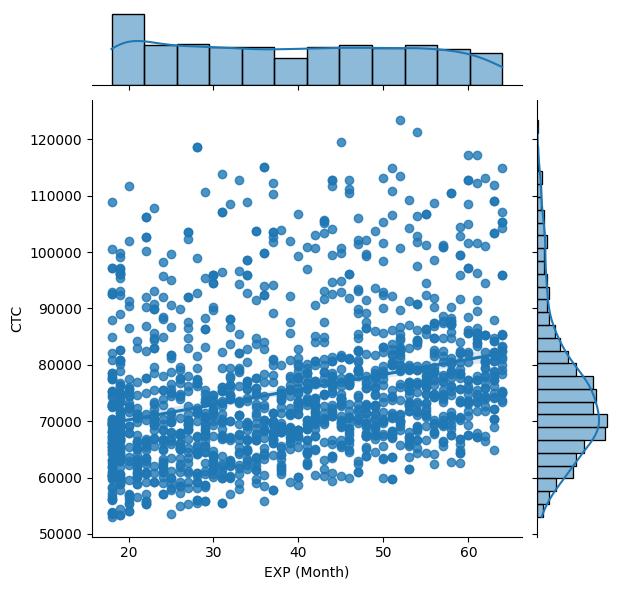

In [37]:
sns.jointplot(x=df['EXP (Month)'], y = df['CTC'], data = df, kind = 'reg')

### Multiple Linear Regression Model

In [38]:
#Multiple linear Regression


# Create a Linear Regression model
lm_multi = LinearRegression()

# Fit the model to the training data
lm_multi.fit(x_train, y_train)

# Predicting values for the training and test datasets using a multiple linear regression model.
y_train_lm_multi = lm_multi.predict(x_train)
y_test_lm_multi = lm_multi.predict(x_test)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_multi_train = r2_score(y_train, y_train_lm_multi)
r2_lm_multi_test = r2_score(y_test, y_test_lm_multi)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_multi_train = mean_squared_error(y_train, y_train_lm_multi)
mse_lm_multi_test = mean_squared_error(y_test, y_test_lm_multi)

#print the result
print("Linear Regression:")
print(f"R-squared (R^2) - Train: {r2_lm_multi_train:.4f}, Test: {r2_lm_multi_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_multi_train:.4f}, Test: {mse_lm_multi_test:.4f}\n")

Linear Regression:
R-squared (R^2) - Train: 0.5335, Test: 0.5367
Mean Squared Error (MSE) - Train: 75026071.4080, Test: 68751323.9296



##### Multiple Linear Regression by using statsmodel api

In [39]:
# Add a constant term to perform linear regression
x_const = sn.add_constant(x_multi)
# Create an Ordinary Least Squares (OLS) model and fit it to the data
lm = sn.OLS(y_multi, x_const).fit()

# Display a summary of the linear regression model, including statistics and coefficients.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     227.1
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          3.36e-256
Time:                        14:06:28   Log-Likelihood:                -16647.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1580   BIC:                         3.336e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.573e+04   1172.349     21.949      0.000    2.34e+04     2.8e+04
Previous CTC            0.4105      0.033     12.542      0.000       0.346       0.475
Previous job change   125.3208    192.846      0.650      0.516    -252.941     503.582
Graduation Marks        6.6007     14.501      0.455      0.649     -21.843      35.044
EXP (Month)           261.6302     15.458     16.925      0.000     231.309     291.951
metro_city            368.3233    433.465      0.850      0.396    -481.903    1218.550
Tier_1               8859.9552    487.502     18.174      0.000    7903.737    9816.174
Tier_2               8989.0489    499.819     17.985      0.000    8008.671    9969.426
Tier_3               7883.2689    503.244     15.665      0.000    6896.173    8870.365
Role_Executive       3121.2698    625.065      4.994      0.000    1895.226    4347.313
Role_Manager         2.261e+04    662.859     34.111      0.000    2.13e+04    2.39e+04
==============================================================================
Omnibus:                       48.290   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.258
Skew:                           0.405   Prob(JB):                     2.72e-12
Kurtosis:                       3.384   Cond. No.                     5.06e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Ridge Regression

#### Standardize data

In [40]:


# Standardize the data using StandardScaler from scikit-learn
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)


##### Ridge Regression Model

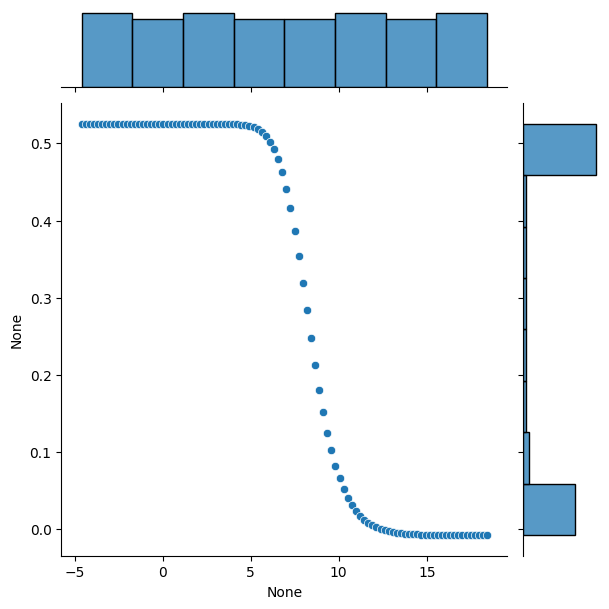

In [41]:
# Define a range of alpha values for Ridge regression
param_range = np.logspace(-2, 8, 100)

# Perform cross-validated validation curve to find the best alpha for Ridge regression
train_scores, valid_scores = validation_curve(
    Ridge(), x_train_s, y_train, param_name="alpha", param_range=param_range, cv=5, scoring='r2')

# Calculate mean R-squared scores for training and validation sets
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(valid_scores, axis = 1)

# Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range), y=test_mean)

In [42]:
# Find the alpha value with the highest validation R-squared
np.where(test_mean==max(test_mean))

# Train a Ridge regression model with the best alpha
lm_r_best = Ridge(alpha = param_range[30])
lm_r_best.fit(x_train_s, y_train)

Ridge(alpha=10.722672220103231)

##### Evaluate the model on the testing and training data

In [43]:
# Predicting values for the training and test datasets using a Ridge regression model with the best hyperparameters.
y_train_lm_r_best = lm_r_best.predict(x_train_s)
y_test_lm_r_best = lm_r_best.predict(x_test_s)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_r_best_train = r2_score(y_train, y_train_lm_r_best)
r2_lm_r_best_test = r2_score(y_test, y_test_lm_r_best)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_r_best_train = mean_squared_error(y_train, y_train_lm_r_best)
mse_lm_r_best_test = mean_squared_error(y_test, y_test_lm_r_best)

In [44]:
# Print the results
print("Ridge Regression:")
print(f"R-squared (R^2) - Train: {r2_lm_r_best_train:.4f}, Test: {r2_lm_r_best_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_r_best_train:.4f}, Test: {mse_lm_r_best_test:.4f}\n")

Ridge Regression:
R-squared (R^2) - Train: 0.5335, Test: 0.5366
Mean Squared Error (MSE) - Train: 75028518.5878, Test: 68763923.8062



## Lasso regression

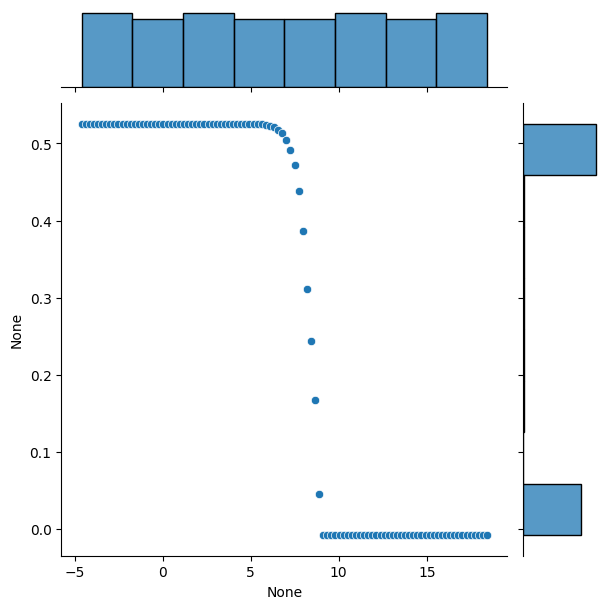

In [45]:
# Define a range of alpha values for Lasso regression
param_range2 = np.logspace(-2,8,100)

# Perform cross-validated validation curve to find the best alpha for Lasso regression
train_score_l, valid_score_l = validation_curve(Lasso(), x_train_s, y_train, param_name="alpha", param_range = param_range2, cv=5, scoring='r2')

# Calculate mean R-squared scores for training and validation sets with Lasso regression
train_mean_l = np.mean(train_score_l, axis=1)
test_mean_l = np.mean(valid_score_l, axis=1)

#Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range2), y=test_mean_l)

In [46]:
# Identify the alpha value with the highest R-squared
np.where(test_mean_l==max(test_mean_l))

# Train a Lasso regression model with the best alpha
lm_l_best = Lasso(alpha = param_range2[39])
lm_l_best.fit(x_train_s, y_train)

Lasso(alpha=86.97490026177834)

##### Evaluate the Lasso model on the testing and training data

In [47]:
# Predicting values for the training and test datasets using a Lasso regression model with the best hyperparameters.
y_train_lm_l_best = lm_l_best.predict(x_train_s)
y_test_lm_l_best = lm_l_best.predict(x_test_s)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_l_best_train = r2_score(y_train, y_train_lm_l_best)
r2_lm_l_best_test = r2_score(y_test, y_test_lm_l_best)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_l_best_train = mean_squared_error(y_train, y_train_lm_l_best)
mse_lm_l_best_test = mean_squared_error(y_test, y_test_lm_l_best)

In [48]:
# Print the results
print("Lasso Regression:")
print(f"R-squared (R^2) - Train: {r2_lm_l_best_train:.4f}, Test: {r2_lm_l_best_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_l_best_train:.4f}, Test: {mse_lm_l_best_test:.4f}\n")

Lasso Regression:
R-squared (R^2) - Train: 0.5332, Test: 0.5374
Mean Squared Error (MSE) - Train: 75080196.9627, Test: 68643390.1817



## Decision Tree Regression

In [49]:
from sklearn import tree

In [50]:


# Create a DecisionTreeRegressor with a maximum depth of 3 and fit it to the training data
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [51]:
# Predicting values for the training and test datasets using a regression tree model.
y_train_regtree = regtree.predict(x_train)
y_test_regtree = regtree.predict(x_test)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_regtree_train = r2_score(y_train, y_train_regtree)
r2_regtree_test = r2_score(y_test, y_test_regtree)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_regtree_train = mean_squared_error(y_train, y_train_regtree)
mse_regtree_test = mean_squared_error(y_test, y_test_regtree)


In [52]:
# Print the results
print("Decision Tree Regression:")
print(f"R-squared (R^2) - Train: {r2_regtree_train:.4f}, Test: {r2_regtree_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_regtree_train:.4f}, Test: {mse_regtree_test:.4f}\n")

Decision Tree Regression:
R-squared (R^2) - Train: 0.6137, Test: 0.5928
Mean Squared Error (MSE) - Train: 62125086.3121, Test: 60424631.0261



In [53]:
from IPython.display import Image
import pydotplus


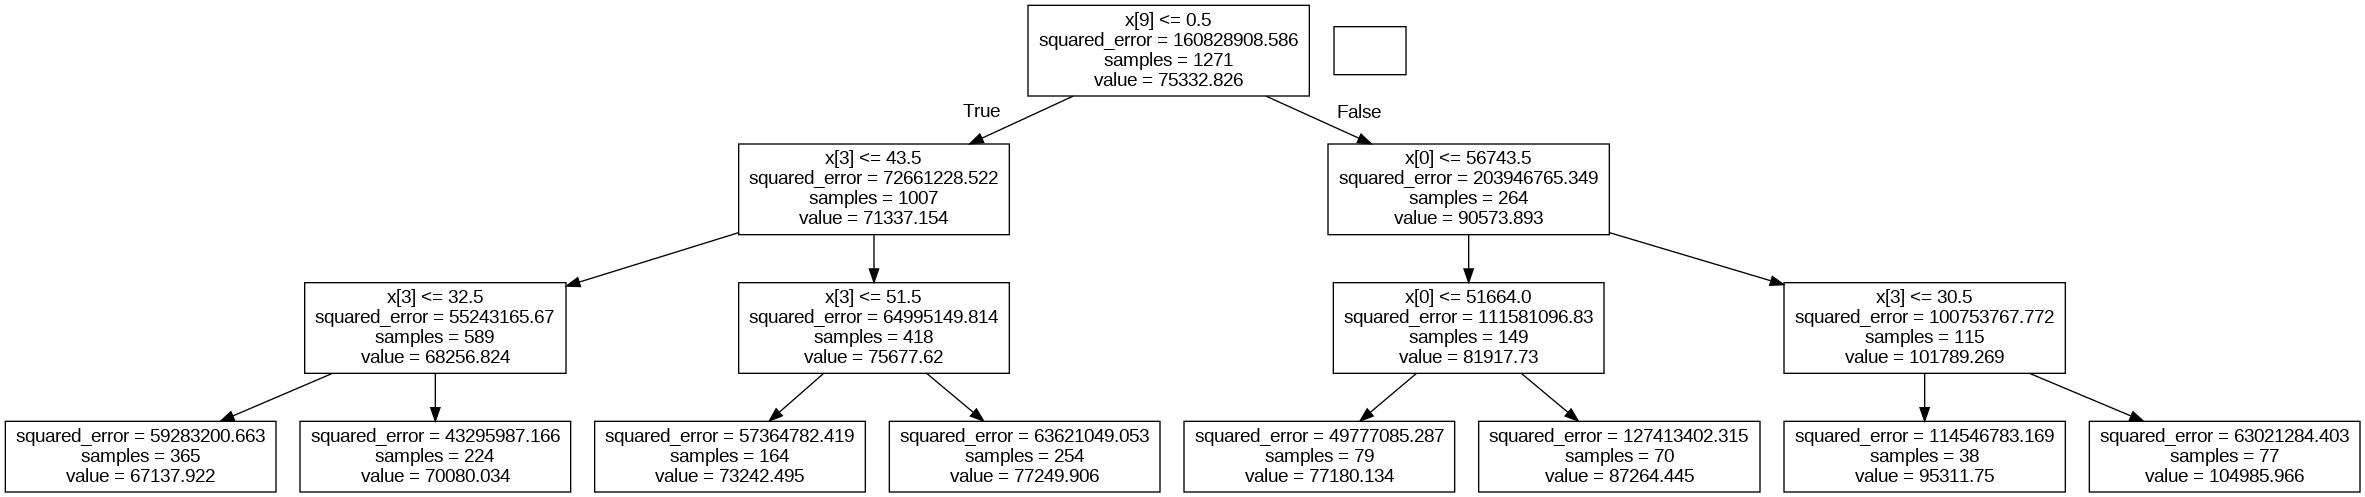

In [54]:
# Export the decision tree as a graphical visualization
dot_data = tree.export_graphviz(regtree, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree as an image
Image(graph.create_png())

## Decision Tree Regression with GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV, cross_val_score


In [57]:

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [2, 3, 4, 5],  # List of possible maximum depths
    'min_samples_split': [2,4, 5,6, 10],  # List of possible values for minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4,6,8]  # List of possible values for minimum samples required at a leaf node
}

# Create a DecisionTreeRegressor
regtree_gs = tree.DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(regtree_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator (DecisionTreeRegressor) with the best hyperparameters
best_regtree = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred = best_regtree.predict(x_train)
y_test_pred = best_regtree.predict(x_test)

# Calculate the R-squared scores for training data
r2_train_dt = r2_score(y_train, y_train_pred)

# Calculate the R-squared scores for testing data
r2_test_dt = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_dt = mean_squared_error(y_train, y_train_pred)

# Calculate the Mean Squared Error for testing data
mse_test_dt = mean_squared_error(y_test, y_test_pred)

# Print the results
print("R-squared (R2) for Training Data:", r2_train_dt)
print("R-squared (R2) for Testing Data:", r2_test_dt)
print("Mean Squared Error (MSE) for Training Data:", mse_train_dt)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_dt)

Best Hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
R-squared (R2) for Training Data: 0.6397831325660944
R-squared (R2) for Testing Data: 0.603220439065417
Mean Squared Error (MSE) for Training Data: 57933285.64360235
Mean Squared Error (MSE) for Testing Data: 58875901.69009934


## RandomForest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor


In [62]:

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100,  300],  # Number of trees in the forest
    'max_depth': [20, 30],  # Maximum depth of the trees
    'min_samples_split': [5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [ 2, 4]  # Minimum samples required at a leaf node
}

# Create a RandomForestRegressor
rf_gs = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator (RandomForestRegressor) with the best hyperparameters
best_rf = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Calculate the R-squared scores for training data
r2_train_rf = r2_score(y_train, y_train_pred)

# Calculate the R-squared scores for testing data
r2_test_rf = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_rf = mean_squared_error(y_train, y_train_pred)

# Calculate the Mean Squared Error for testing data
mse_test_rf = mean_squared_error(y_test, y_test_pred)

# Print the results
print("R-squared (R2) for Training Data:", r2_train_rf)
print("R-squared (R2) for Testing Data:", r2_test_rf)
print("Mean Squared Error (MSE) for Training Data:", mse_train_rf)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_rf)


Best Hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
R-squared (R2) for Training Data: 0.8234945871727585
R-squared (R2) for Testing Data: 0.5901647348570631
Mean Squared Error (MSE) for Training Data: 28858256.332277898
Mean Squared Error (MSE) for Testing Data: 58806181.65415885


In [63]:


# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define the RandomForestRegressor with the best hyperparameters
best_rf = RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=5, min_samples_leaf=2)

# Fit the model on the training data
best_rf.fit(x_train, y_train)

# Make predictions on training and testing sets
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Calculate R-squared scores for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Squared Error for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print("R-squared (R2) for Training Data:", r2_train)
print("R-squared (R2) for Testing Data:", r2_test)
print("Mean Squared Error (MSE) for Training Data:", mse_train)
print("Mean Squared Error (MSE) for Testing Data:", mse_test)

# Perform cross-validation to calculate training and validation scores
cv_scores = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='r2')
cv_mse = -cross_val_score(best_rf, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean R-squared and MSE for cross-validation
mean_cv_r2 = cv_scores.mean()
mean_cv_mse = cv_mse.mean()

# Print cross-validation results
print("Mean R-squared (R2) for Cross-Validation:", mean_cv_r2)
print("Mean Mean Squared Error (MSE) for Cross-Validation:", mean_cv_mse)


R-squared (R2) for Training Data: 0.8885273250142076
R-squared (R2) for Testing Data: 0.6214054759210137
Mean Squared Error (MSE) for Training Data: 18560306.52384576
Mean Squared Error (MSE) for Testing Data: 56434333.50226604
Mean R-squared (R2) for Cross-Validation: 0.5734676982936557
Mean Mean Squared Error (MSE) for Cross-Validation: 69384900.72597018


## XG Boost Regressor

In [65]:
from xgboost import XGBRegressor

In [66]:


# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 4, 5],  # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight (hessian) needed in a child
}

# Create an XGBRegressor
xgb_gs = XGBRegressor()

# Create the GridSearchCV object with R2 scoring
grid_search = GridSearchCV(xgb_gs, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding R-squared
print("Best Hyperparameters: ", grid_search.best_params_)

best_xgb_param = grid_search.best_params_
# Get the best estimator (XGBRegressor) with the best hyperparameters
best_xgb = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred = best_xgb.predict(x_train)
y_test_pred = best_xgb.predict(x_test)

# Calculate the R-squared scores for training data
r2_train_xgb = r2_score(y_train, y_train_pred)

# Calculate the R-squared scores for testing data
r2_test_xgb = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_xgb = mean_squared_error(y_train, y_train_pred)

# Calculate the Mean Squared Error for testing data
mse_test_xgb = mean_squared_error(y_test, y_test_pred)

# Print the results
print("R-squared (R2) for Training Data:", r2_train_xgb)
print("R-squared (R2) for Testing Data:", r2_test_xgb)
print("Mean Squared Error (MSE) for Training Data:", mse_train_xgb)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_xgb)

Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300}
R-squared (R2) for Training Data: 0.6550798848737913
R-squared (R2) for Testing Data: 0.6221838108158975
Mean Squared Error (MSE) for Training Data: 57429527.584213264
Mean Squared Error (MSE) for Testing Data: 56318312.77761033


## Bagging Regressor

In [68]:
# importing decisiontreeregressor
from sklearn.tree import DecisionTreeRegressor

In [69]:

# Create a base regression model
base_model = DecisionTreeRegressor()

# Create a BaggingRegressor with the base model
bagging_reg = BaggingRegressor(base_model, random_state=0)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # List of possible numbers of base models
}

# Create the GridSearchCV object
grid_search = GridSearchCV(bagging_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator (BaggingRegressor) with the best hyperparameters
best_bagging_reg = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred = best_bagging_reg.predict(x_train)
y_test_pred = best_bagging_reg.predict(x_test)

# Calculate the R-squared scores for training data
r2_train_bagging_reg = r2_score(y_train, y_train_pred)

# Calculate the R-squared scores for testing data
r2_test_bagging_reg = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_bagging_reg = mean_squared_error(y_train, y_train_pred)
mse_test_bagging_reg = mean_squared_error(y_test, y_test_pred)

# Print the results
print("R-squared (R2) for Training Data:", r2_train_bagging_reg)
print("R-squared (R2) for Testing Data:", r2_test_bagging_reg)
print("Mean Squared Error (MSE) for Training Data:", mse_train_bagging_reg)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_bagging_reg)


Best Hyperparameters:  {'n_estimators': 150}
R-squared (R2) for Training Data: 0.9435666486874827
R-squared (R2) for Testing Data: 0.6264426044370632
Mean Squared Error (MSE) for Training Data: 9396206.72655153
Mean Squared Error (MSE) for Testing Data: 55683485.37190794


# Compare Different Models  

In [74]:
!pip install colorama

# Tabulate
Tabulate is a Python library used to easily format tabular data in a visually appealing way. It offers various features like aligning columns, setting column headers, and choosing different table formats. It simplifies the task of displaying data in a structured manner, making it more readable for users. The library supports multiple output formats, including plain text, LaTeX, and HTML.

# Colorama
Colorama,is a Python library that simplifies printing colored text in terminal environments. It provides cross-platform support for ANSI escape character sequences, allowing developers to easily add colored text to their console applications. Colorama makes it simple to change text color, background color, and text style, enhancing the visual presentation of terminal output. It's particularly useful for creating more visually engaging command-line interfaces and debugging tools.

In [75]:
from tabulate import tabulate
from colorama import Fore, Style

In [76]:


# Function to colorize values based on a threshold
def colorize(value, threshold=0.6):
    if value < threshold:
        return f"{Fore.RED}{value:.4f}{Style.RESET_ALL}"
    return f"{Fore.GREEN}{value:.4f}{Style.RESET_ALL}"

# Define your headings
headings = ["Model", "R-squared (Train)", "R-squared (Test)", "MSE (Train)", "MSE (Test)"]

# Data for the table
data = [
    ["Linear Regression", colorize(r2_lm_multi_train), colorize(r2_lm_multi_test), colorize(mse_lm_multi_train), colorize(mse_lm_multi_test)],
    ["Ridge Regression", colorize(r2_lm_r_best_train), colorize(r2_lm_r_best_test), colorize(mse_lm_r_best_train), colorize(mse_lm_r_best_test)],
    ["Lasso Regression", colorize(r2_lm_l_best_train), colorize(r2_lm_l_best_test), colorize(mse_lm_l_best_train), colorize(mse_lm_l_best_test)],
    ["Decision Tree Regression", colorize(r2_regtree_train), colorize(r2_regtree_test), colorize(mse_regtree_train), colorize(mse_regtree_test)],
    ["Decision Tree with GridSearchCV", colorize(r2_train_dt), colorize(r2_test_dt), colorize(mse_train_dt), colorize(mse_test_dt)],
    ["Random Forest Regressor", colorize(r2_train_rf), colorize(r2_test_rf), colorize(mse_train_rf), colorize(mse_test_rf)],
    ["XG Boost Regressor", colorize(r2_train_xgb), colorize(r2_test_xgb), colorize(mse_train_xgb), colorize(mse_test_xgb)],
    ["Bagging Regressor", colorize(r2_train_bagging_reg), colorize(r2_test_bagging_reg), colorize(mse_train_bagging_reg), colorize(mse_test_bagging_reg)],
]

# Print the table
table = tabulate(data, headers=headings, tablefmt="fancy_grid")
print(table)


╒═════════════════════════════════╤═════════════════════╤════════════════════╤═══════════════╤══════════════╕
│ Model                           │   R-squared (Train) │   R-squared (Test) │   MSE (Train) │   MSE (Test) │
╞═════════════════════════════════╪═════════════════════╪════════════════════╪═══════════════╪══════════════╡
│ Linear Regression               │              0.5335 │             0.5367 │   7.50261e+07 │  6.87513e+07 │
├─────────────────────────────────┼─────────────────────┼────────────────────┼───────────────┼──────────────┤
│ Ridge Regression                │              0.5335 │             0.5366 │   7.50285e+07 │  6.87639e+07 │
├─────────────────────────────────┼─────────────────────┼────────────────────┼───────────────┼──────────────┤
│ Lasso Regression                │              0.5332 │             0.5374 │   7.50802e+07 │  6.86434e+07 │
├─────────────────────────────────┼─────────────────────┼────────────────────┼───────────────┼──────────────┤
│ Decision

In [77]:
# Define the RandomForestRegressor with the best hyperparameters
best_rf = RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=5, min_samples_leaf=2)

# Fit the model on the entire dataset
best_rf.fit(x_train, y_train)

def predict_salary_interface(previous_ctc, prev_job_change, graduation_marks, exp_month, metro_city, tier, role):
    """

    Args:
      previous_ctc:
      prev_job_change:
      graduation_marks:
      exp_month:
      metro_city:
      tier:
      role:

    Returns:

    """
    try:
        previous_ctc = float(previous_ctc)
        prev_job_change = float(prev_job_change)
        graduation_marks = float(graduation_marks)
        exp_month = float(exp_month)
        metro_city = float(metro_city)  # Assuming 1 represents metro city

        # Make a prediction using the trained model
        input_data = {
            'Previous CTC': [previous_ctc],
            'Previous job change': [prev_job_change],
            'Graduation Marks': [graduation_marks],
            'EXP (Month)': [exp_month],
            'metro_city': [metro_city],
            'Tier_1': [1 if tier == 'Tier 1' else 0],
            'Tier_2': [1 if tier == 'Tier 2' else 0],
            'Tier_3': [1 if tier == 'Tier 3' else 0],
            'Role_Executive': [1 if role == 'Executive' else 0],
            'Role_Manager': [1 if role == 'Manager' else 0]
        }

        input_df = pd.DataFrame(input_data)
        predicted_salary = best_rf.predict(input_df)[0]

        # Calculate R-squared and MSE for the prediction
        y_pred_all = best_rf.predict(x_train)
        r2 = r2_score(y_train, y_pred_all)
        mse = mean_squared_error(y_train, y_pred_all)

        return f"{predicted_salary:.0f}", f"{r2*100:.2f}%"

    except ValueError:
        return "Error", "Error in prediction", "Error in prediction"



In [78]:
print(best_rf)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300)


# Gradio Python library

Gradio is a Python library for creating customizable UIs for machine learning models, enabling easy deployment and interaction. It allows users to build interfaces for models without needing web development skills. With Gradio, developers can create interfaces for various input types such as text, images, and audio. It supports a wide range of machine learning frameworks like TensorFlow, PyTorch, and Scikit-learn. Gradio simplifies the process of sharing and showcasing machine learning models with stakeholders or non-technical users. It provides real-time feedback, making it suitable for debugging and testing models. The library supports collaborative development by allowing multiple users to work on interfaces simultaneously. Gradio offers pre-built components for common tasks like uploading files or selecting options, reducing development time. It supports both local and cloud deployment options, ensuring flexibility in deployment environments. Overall, Gradio streamlines the process of building interactive machine learning applications with minimal coding effort.

In [82]:
import gradio as gr

In [83]:
# Define Gradio inputs
inputs = [
    gr.Number(label="Previous CTC"),
    gr.Number(label="Previous Job Change"),
    gr.Number(label="Graduation Marks"),
    gr.Number(label="Experience in Months"),
    gr.Number(label="Metro City (1 for Yes, 0 for No)"),
    gr.Dropdown(choices=["Tier 1", "Tier 2", "Tier 3"], label="Tier"),
    gr.Dropdown(choices=["Executive", "Manager"], label="Role"),
]


In [84]:
# Create Gradio interface
iface = gr.Interface(
    fn=predict_salary_interface,
    inputs=inputs,
    outputs=[
        gr.Textbox(label="Predicted CTC"),
        gr.Textbox(label="Accuracy")
    ],
    title="Salary Prediction",
    description="Predict the salary and view overall model evaluation metrics."
).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://57e8cec6bb0343a2d0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
